<a href="https://colab.research.google.com/github/Priyankamadineni999/ML_Algorithms/blob/main/Linear_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [4]:
df=pd.read_csv('linear_reg.csv')

In [5]:
df.head()

,Weight,Height
0,20,123
1,30,124
2,28,130
3,30,143
4,35,134


In [6]:
df.head(19)

,Weight,Height
0,20,123
1,30,124
2,28,130
3,30,143
4,35,134
5,40,140
6,45,143
7,50,153
8,60,168
9,55,173


In [7]:
import matplotlib.pyplot as plt
#matplotlib inline

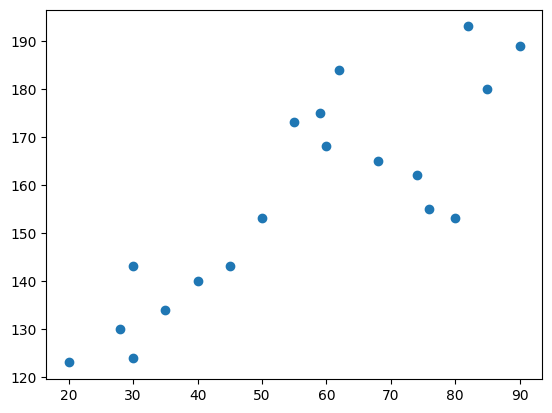

In [8]:
plt.scatter(df['Weight'],df['Height'])

Text(0, 0.5, 'Height')

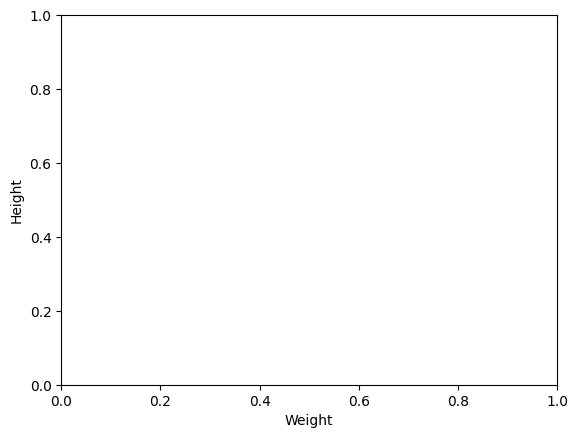

In [9]:
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
##correlation
df.corr()

,Weight,Height
Weight,1.000000,0.835048
Height,0.835048,1.000000


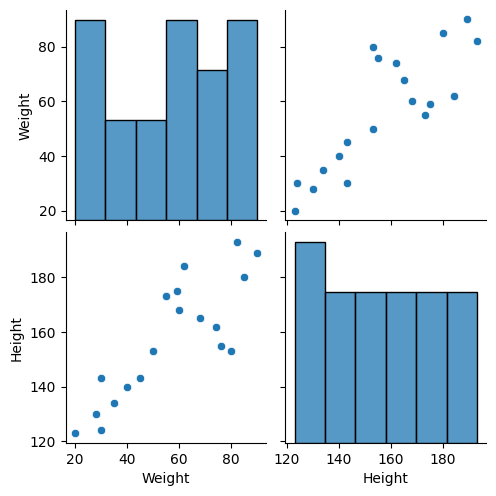

In [11]:
#seaborn for visualizaion
import seaborn as sns
sns.pairplot(df)


In [12]:
##independent or dependent features
x=df[['Weight']]#independent feature should be dataframe or 2 dimensional array
y=df['Height']#this variable can in 1d array or series



In [13]:
np.array(x).shape


(19, 1)

In [14]:
np.array(y).shape

(19,)

In [15]:
y

0     123
1     124
2     130
3     143
4     134
5     140
6     143
7     153
8     168
9     173
10    153
11    180
12    165
13    189
14    175
15    184
16    155
17    162
18    193
Name: Height, dtype: int64

In [16]:
x

,Weight
0,20
1,30
2,28
3,30
4,35
5,40
6,45
7,50
8,60
9,55


In [17]:
##Train Test slpit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
##standardization
from sklearn.preprocessing import StandardScaler


In [19]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)


In [20]:
x_test=scaler.transform(x_test)

In [21]:
x_test

array([[-2.05297862],
       [-1.0153721 ],
       [ 1.31924258],
       [-1.53417536],
       [ 0.02223443]])

In [22]:
##Apply simple linear regression
from sklearn.linear_model import LinearRegression



In [23]:
regression=LinearRegression()

In [24]:
regression.fit(x_train,y_train)

LinearRegression()

In [25]:
print("coeficient or slope:", regression.coef_)

coeficient or slope: [14.31208796]


In [26]:
print("intercept:", regression.intercept_)

intercept: 160.85714285714286


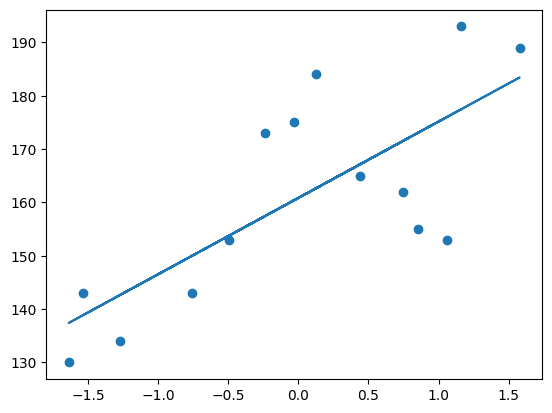

In [27]:
##plot training data plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [28]:
##prediction for test data
regression.predict(x_test)

array([131.47473222, 146.32504806, 179.73825872, 138.89989014,
       161.17536391])

In [29]:
y_pred=regression.predict(x_test)


In [30]:
#performance metrics
from sklearn.metrics import mean_squared_error

In [31]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(rmse)


76.09564231586617
8.723281625389964


In [32]:
from sklearn.metrics import r2_score

In [33]:
score=r2_score(y_test,y_pred)
print(score)

0.858242097027075


In [34]:
#display adjusted R-squared
#1-[(1-r2)*(n-1)(n-k-1)]
1-(1-score)*len(y_test)-1/len(y_test)-x_test.shape[1]-1

-1.908789514864625

In [35]:
#ols linear regression
import statsmodels.api as sm

In [36]:
model=sm.OLS(y_train,x_train).fit()

In [37]:
prediction=model.predict(x_test)
print(prediction)

[-29.38241064 -14.53209479  18.88111586 -21.95725272   0.31822105]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.069
Method:                 Least Squares   F-statistic:                             0.1023
Date:                Mon, 25 Dec 2023   Prob (F-statistic):                       0.754
Time:                        04:58:43   Log-Likelihood:                         -91.037
No. Observations:                  14   AIC:                                      184.1
Df Residuals:                      13   BIC:                                      184.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
